# canopy cover added to pickled df

In [17]:
from scripts.als import *

filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list5.tiff'
# filename = '../data/sodankyla_als/lasfiles/tiffs/list30.tiff'

data = load_raster(filename)

# df=pd.read_pickle('five_sites_0-05_0-005box.pkl')
df = pd.read_pickle('five_sites_0-05_0-005box_snowreffed.pkl')

df['cc'] = None

for index, row in df.iterrows():
    if row['camera'] == 'sodankyla_full':
        df.at[index,'cc'] = average_pixel_value(data, longitude=row['longitude'], latitude=row['latitude'], w=0.005)
    else:
        continue

# df = df[df['camera'] == 'sodankyla_full']

In [19]:
df

,camera,date,pvpg,y_strong,y_weak,x_strong,x_weak,longitude,latitude,meanEgstrong,...,night,asr,data_quantity,FSC,TreeSnow,JointSnow,Confidence,MOD10A1F,MYD10A1F,cc
0,sodankyla_full,12/01/2019,-5.859481e-02,0.418798,NaN,7.147356e+00,NaN,26.718589,67.314333,3.432135,...,1.0,0.265230,5.0,1.0,0.0,1.0,1.0,211,211,7.587237
1,sodankyla_full,12/01/2019,-1.107947e-01,0.693207,0.281346,6.256682e+00,2.539343e+00,26.718589,67.319333,3.665784,...,1.0,0.246385,6.0,1.0,0.0,1.0,1.0,211,211,28.405676
2,sodankyla_full,12/01/2019,-1.307186e+00,5.701271,1.996741,4.361483e+00,1.527510e+00,26.718589,67.334333,4.188318,...,1.0,0.289655,6.0,1.0,0.0,1.0,1.0,211,211,25.00197
3,sodankyla_full,12/01/2019,-2.447389e-01,1.431021,NaN,5.847133e+00,NaN,26.718589,67.339333,3.917523,...,1.0,0.318363,2.0,1.0,0.0,1.0,1.0,211,211,4.266624
4,sodankyla_full,12/01/2019,-6.999055e-02,0.656128,NaN,9.374517e+00,NaN,26.731579,67.339333,3.940102,...,1.0,0.348368,2.0,1.0,0.0,1.0,1.0,211,211,6.350027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,torgnon,21/08/2023,-5.881129e+00,1.735232,NaN,2.950508e-01,NaN,7.542963,45.806300,0.106401,...,0.0,0.071575,5.0,0.0,0.0,0.0,1.0,0,0,None
2847,torgnon,21/08/2023,-7.604916e+01,13.056701,NaN,1.716876e-01,NaN,7.542963,45.811300,0.162791,...,0.0,0.073169,3.0,0.0,0.0,0.0,1.0,0,0,None
2848,torgnon,21/08/2023,-3.200856e-17,NaN,0.409416,NaN,1.279081e+16,7.499913,45.816300,NaN,...,0.0,0.055065,2.0,0.0,0.0,0.0,1.0,0,13,None
2849,torgnon,21/08/2023,-1.648810e-21,0.897887,NaN,5.445669e+20,NaN,7.507088,45.836300,0.049296,...,0.0,0.080508,2.0,0.0,0.0,0.0,1.0,0,0,None


In [20]:
df.to_pickle('five_sites_0-05_0-005box_snowreffed.pkl')

In [2]:
for index, row in df.iterrows():
    print(average_pixel_value(data, longitude=row['longitude'], latitude=row['latitude'], w=.005))

7.587237358093262
28.405675888061523
25.001970291137695
4.266624450683594
6.350026607513428
0.4633587896823883
32.879798889160156
34.398014068603516
9.867907524108887
21.90721893310547
40.9176139831543
41.328269958496094
24.2568302154541
23.757020950317383
23.580875396728516
8.483463287353516
8.61208724975586
5.477073669433594
20.64970588684082
20.036781311035156
16.28424644470215
16.571855545043945
21.770524978637695
9.48108959197998
16.388118743896484
6.156435966491699
9.357182502746582
34.398014068603516
6.065202236175537
23.087112426757812
28.506431579589844
23.628395080566406
22.89376449584961
22.086233139038086
4.607021331787109
27.359848022460938
12.076653480529785
12.894259452819824
28.9305419921875
35.70356750488281
19.156126022338867
20.22084617614746
26.043399810791016
14.140623092651367
32.61212921142578
32.478553771972656
33.662391662597656
27.204299926757812
38.98680114746094
39.58610916137695
34.42881393432617
7.587237358093262
16.388118743896484
6.156435966491699
13.885

In [4]:
# def load_raster(filename):
#     # Load the raster
#     with rasterio.open(filename) as src:
#         # Define the source and destination CRS
#         src_crs = src.crs
#         dst_crs = 'EPSG:4326'
        
#         # Calculate the transform and the dimensions of the new image
#         transform, width, height = calculate_default_transform(
#             src_crs, dst_crs, src.width, src.height, *src.bounds)
        
#         # Define the metadata for the new image
#         kwargs = src.meta.copy()
#         kwargs.update({
#             'crs': dst_crs,
#             'transform': transform,
#             'width': width,
#             'height': height
#         })
        
#         # Create a new array to store the reprojected image
#         reprojected_data = np.empty((height, width), dtype=np.float32) #dtype=np.float32 or src.meta['dtype']
        
#         # Reproject the data
#         reproject(
#             source=rasterio.band(src, 1),
#             destination=reprojected_data,
#             src_transform=src.transform,
#             src_crs=src.crs,
#             dst_transform=transform,
#             dst_crs=dst_crs,
#             resampling=Resampling.nearest)
        
#         # # Replace zeros with np.nan to handle missing data
#         # reprojected_data[reprojected_data == 0] = np.nan
        
#         # Get the extent of the reprojected data
#         extent = [transform * (0, 0), transform * (width, 0), transform * (0, height), transform * (width, height)]
#         lon = np.linspace(extent[0][0], extent[1][0], width)
#         lat = np.linspace(extent[2][1], extent[0][1], height)
        
#         # Create an xarray DataArray
#         data_array = xr.DataArray(reprojected_data, coords=[lat, lon], dims=["lat", "lon"])
        
#     return data_array

# def add_buffer(data_array, latitude, buffer_size_m=500, increment_m=30, buffer_value=250):
#     # Constants for conversion
#     degrees_per_meter_lat = 1 / 111320
#     degrees_per_meter_lon = degrees_per_meter_lat / np.cos(np.radians(latitude))
    
#     # Calculate the buffer size and increment in degrees
#     buffer_size_lat = buffer_size_m * degrees_per_meter_lat
#     buffer_size_lon = buffer_size_m * degrees_per_meter_lon
    
#     increment_lat = increment_m * degrees_per_meter_lat
#     increment_lon = increment_m * degrees_per_meter_lon
    
#     # Get the current coordinates
#     lon = data_array.lon.values
#     lat = data_array.lat.values
#     height, width = data_array.shape
    
#     # Calculate the padding width in terms of number of increments
#     pad_width_lat = int(buffer_size_m / increment_m)
#     pad_width_lon = int(buffer_size_m / increment_m)
    
#     # Create padded longitude and latitude arrays
#     lon_buffered = np.pad(
#         lon, 
#         pad_width=pad_width_lon, 
#         mode='linear_ramp', 
#         end_values=(lon[0] - buffer_size_lon, lon[-1] + buffer_size_lon)
#     )
#     lat_buffered = np.pad(
#         lat, 
#         pad_width=pad_width_lat, 
#         mode='linear_ramp', 
#         end_values=(lat[0] - buffer_size_lat, lat[-1] + buffer_size_lat)
#     )
    
#     # Create a new data array with buffer
#     buffered_data = np.full(
#         (height + 2 * pad_width_lat, width + 2 * pad_width_lon), 
#         buffer_value, 
#         dtype=data_array.dtype
#     )
#     buffered_data[pad_width_lat:-pad_width_lat, pad_width_lon:-pad_width_lon] = data_array.values
    
#     # Create an xarray DataArray
#     buffered_data_array = xr.DataArray(buffered_data, coords=[lat_buffered, lon_buffered], dims=["lat", "lon"])
    
#     return buffered_data_array


# # data = add_buffer(load_raster(filename), latitude=67.3670, increment_m=5)
# data = load_raster(filename)
# data.plot(cmap='gray')
# # data.sel(lon=slice(

In [5]:
# def average_pixel_value(data_array, longitude, latitude, w):
#     # Calculate the bounding box
#     lat_min = latitude - w / 2
#     lat_max = latitude + w / 2
#     lon_min = longitude - w / (2 * np.cos(np.radians(latitude)))
#     lon_max = longitude + w / (2 * np.cos(np.radians(latitude)))

#     # data.plot(cmap='gray')
#     # Select the data within the bounding box
#     sub_data = data_array.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
#     # sub_data.plot(cmap='gray')

#     # Filter out values greater than 100
#     valid_data = sub_data.where((sub_data >= 0) & (sub_data <= 100), drop=True)
#     # valid_data.plot(cmap='gray')

#     # Calculate the average of the valid data
#     average_value = valid_data.mean().item()

#     return average_value

# average_value = average_pixel_value(data, 26.634154, 67.361833, 0.11)
# average_value

# Canopy Cover Accuracy Analysis

In [1]:
from scripts.FSC_dataframe_phoreal import *

# df.to_pickle('five_sites_5km_1kmbox.pkl')
# df_pure.to_pickle('five_sites_pure_5km.pkl')

df=pd.read_pickle('five_sites_0-05_0-005box_snowreffed.pkl')
# df=pd.read_pickle('five_sites_5km_thresh5.pkl')
# df_pure=pd.read_pickle('five_sites_pure_10km.pkl')

In [2]:
df

,camera,date,pvpg,y_strong,y_weak,x_strong,x_weak,longitude,latitude,meanEgstrong,...,night,asr,data_quantity,FSC,TreeSnow,JointSnow,Confidence,MOD10A1F,MYD10A1F,cc
0,sodankyla_full,12/01/2019,-5.859481e-02,0.418798,NaN,7.147356e+00,NaN,26.718589,67.314333,3.432135,...,1.0,0.265230,5.0,1.0,0.0,1.0,1.0,211,211,7.587237
1,sodankyla_full,12/01/2019,-1.107947e-01,0.693207,0.281346,6.256682e+00,2.539343e+00,26.718589,67.319333,3.665784,...,1.0,0.246385,6.0,1.0,0.0,1.0,1.0,211,211,28.405676
2,sodankyla_full,12/01/2019,-1.307186e+00,5.701271,1.996741,4.361483e+00,1.527510e+00,26.718589,67.334333,4.188318,...,1.0,0.289655,6.0,1.0,0.0,1.0,1.0,211,211,25.00197
3,sodankyla_full,12/01/2019,-2.447389e-01,1.431021,NaN,5.847133e+00,NaN,26.718589,67.339333,3.917523,...,1.0,0.318363,2.0,1.0,0.0,1.0,1.0,211,211,4.266624
4,sodankyla_full,12/01/2019,-6.999055e-02,0.656128,NaN,9.374517e+00,NaN,26.731579,67.339333,3.940102,...,1.0,0.348368,2.0,1.0,0.0,1.0,1.0,211,211,6.350027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,torgnon,21/08/2023,-5.881129e+00,1.735232,NaN,2.950508e-01,NaN,7.542963,45.806300,0.106401,...,0.0,0.071575,5.0,0.0,0.0,0.0,1.0,0,0,None
2847,torgnon,21/08/2023,-7.604916e+01,13.056701,NaN,1.716876e-01,NaN,7.542963,45.811300,0.162791,...,0.0,0.073169,3.0,0.0,0.0,0.0,1.0,0,0,None
2848,torgnon,21/08/2023,-3.200856e-17,NaN,0.409416,NaN,1.279081e+16,7.499913,45.816300,NaN,...,0.0,0.055065,2.0,0.0,0.0,0.0,1.0,0,13,None
2849,torgnon,21/08/2023,-1.648810e-21,0.897887,NaN,5.445669e+20,NaN,7.507088,45.836300,0.049296,...,0.0,0.080508,2.0,0.0,0.0,0.0,1.0,0,0,None


In [3]:
loc_df = df[(df['Confidence'] == 1)&(df['cc'] >= 0)&(df['msw']<3)].reset_index(drop=True)
loc_df

,camera,date,pvpg,y_strong,y_weak,x_strong,x_weak,longitude,latitude,meanEgstrong,...,night,asr,data_quantity,FSC,TreeSnow,JointSnow,Confidence,MOD10A1F,MYD10A1F,cc
0,sodankyla_full,12/01/2019,-5.859481e-02,0.418798,NaN,7.147356e+00,NaN,26.718589,67.314333,3.432135,...,1.0,0.265230,5.0,1.0,0.0,1.0,1.0,211,211,7.587237
1,sodankyla_full,12/01/2019,-1.107947e-01,0.693207,0.281346,6.256682e+00,2.539343e+00,26.718589,67.319333,3.665784,...,1.0,0.246385,6.0,1.0,0.0,1.0,1.0,211,211,28.405676
2,sodankyla_full,12/01/2019,-1.307186e+00,5.701271,1.996741,4.361483e+00,1.527510e+00,26.718589,67.334333,4.188318,...,1.0,0.289655,6.0,1.0,0.0,1.0,1.0,211,211,25.00197
3,sodankyla_full,12/01/2019,-2.447389e-01,1.431021,NaN,5.847133e+00,NaN,26.718589,67.339333,3.917523,...,1.0,0.318363,2.0,1.0,0.0,1.0,1.0,211,211,4.266624
4,sodankyla_full,12/01/2019,-6.999055e-02,0.656128,NaN,9.374517e+00,NaN,26.731579,67.339333,3.940102,...,1.0,0.348368,2.0,1.0,0.0,1.0,1.0,211,211,6.350027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,sodankyla_full,05/09/2023,-1.590022e+00,NaN,0.429514,NaN,2.701311e-01,26.523739,67.374333,NaN,...,0.0,0.005548,4.0,0.0,0.0,0.0,1.0,0,0,34.744061
566,sodankyla_full,05/09/2023,-1.406287e-19,0.612243,0.378423,4.353616e+18,2.690935e+18,26.523739,67.384333,1.059881,...,0.0,0.038938,5.0,0.0,0.0,0.0,1.0,0,0,32.234726
567,sodankyla_full,05/09/2023,-1.020595e-34,0.368458,0.300757,3.610228e+33,2.946883e+33,26.536729,67.399333,0.643045,...,0.0,0.056450,6.0,0.0,0.0,0.0,1.0,0,0,40.700916
568,sodankyla_full,05/09/2023,-1.091024e-01,0.427258,0.349974,3.916123e+00,3.207761e+00,26.536729,67.404333,0.904017,...,0.0,0.096813,10.0,0.0,0.0,0.0,1.0,0,0,49.305721


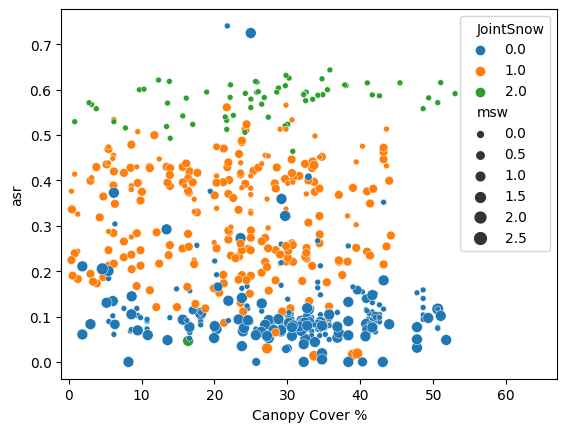

In [30]:
from scripts.hist_plot import *
from scripts.confusion import *

plt.figure()

# hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

scatter = sns.scatterplot(loc_df, x='cc', y='asr', size='msw', hue='JointSnow',palette='tab10',legend='brief')

# handles, labels = scatter.get_legend_handles_labels()
# new_labels = [hue_labels[label] if label in hue_labels else label for label in labels]

# scatter.legend(handles=handles, labels=new_labels, loc='upper right')
plt.xlabel('Canopy Cover %')
# plt.ylim(-2.5,100)
plt.xlim(-1,67)
# plt.savefig('./images/canopycover/asr_vs_canopycover')
plt.show()

83


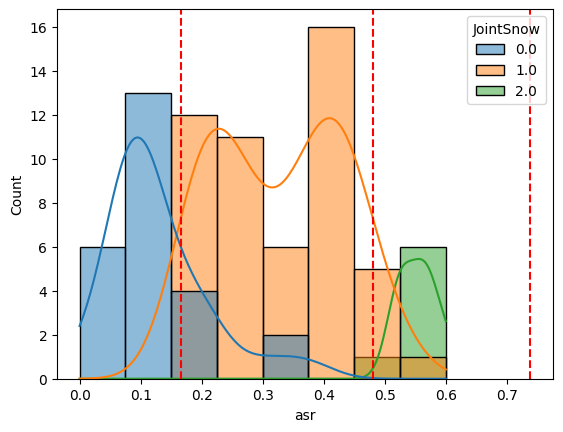

80


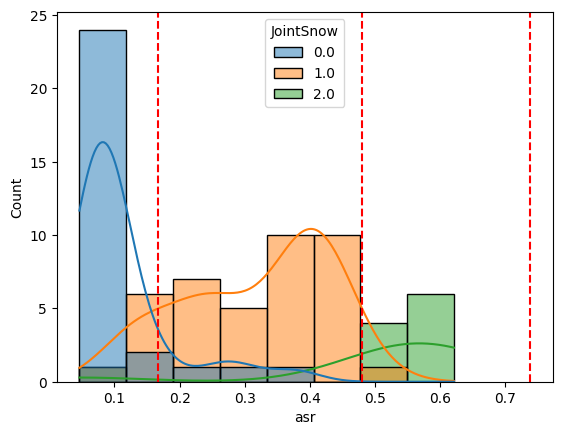

89


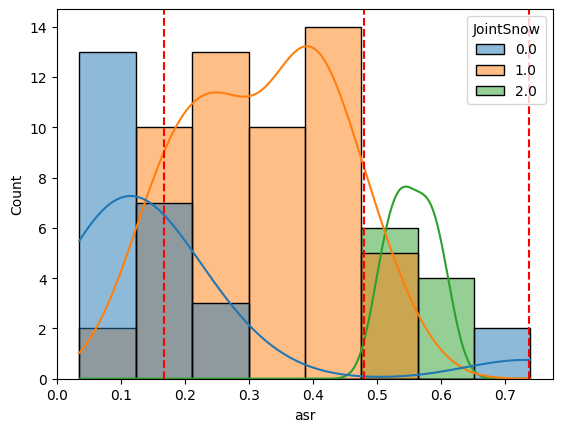

77


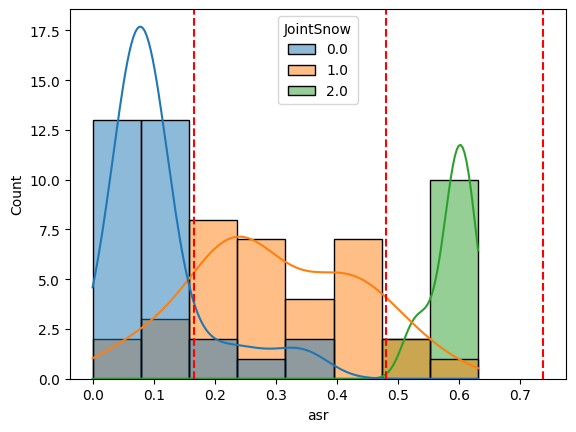

75


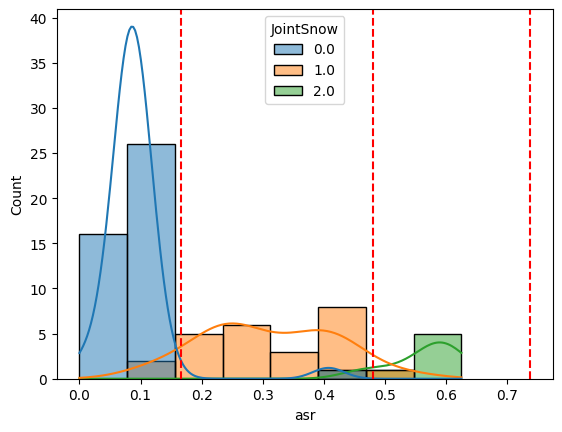

79


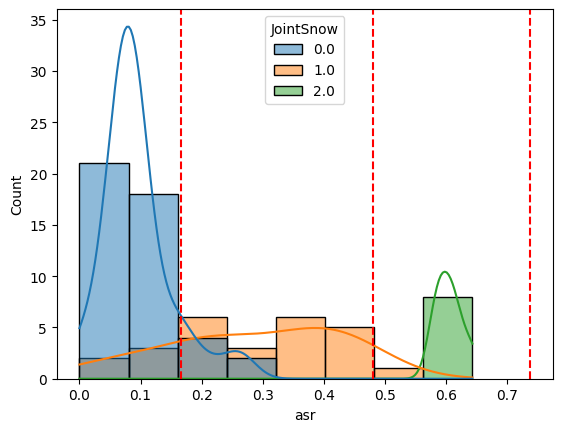

87


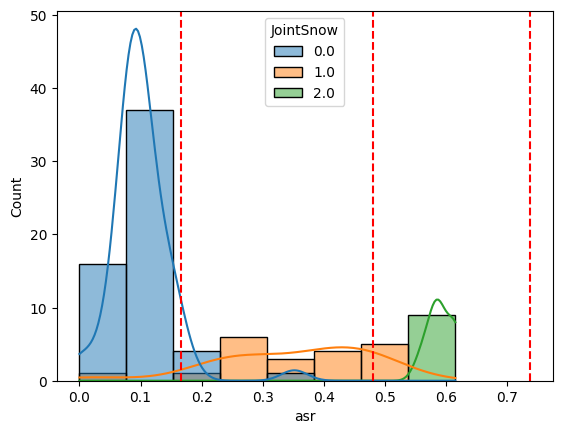

[0.9036144578313253, 0.85, 0.8089887640449438, 0.8311688311688312, 0.9333333333333333, 0.8734177215189873, 0.9540229885057471]


In [4]:
from scripts.hist_plot import *
from scripts.confusion import *

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}

accuracy = []
canopy = [0,10,20,25,30,33,39,100]

for i in range(len(canopy)-1):
    cc_df = loc_df[(loc_df['cc'] < canopy[i+1])&(loc_df['cc'] >= canopy[i])].reset_index(drop=True)
    print(cc_df.shape[0])
    FI = hist_plot(cc_df, hue_labels, X='asr', Hue='JointSnow', plot=True, preset=True)
#     print(FI)
    acc = confusion(cc_df, FI, variable='JointSnow',plot=False)
    accuracy.append(acc)
    
print(accuracy)